### Compare binding free-energies between two sugammadex-rocuronium poses using YANK.
    - Pose #1 is the expected low-energy host-guest complex
    - Pose #2 is the expected high-energy host-guest complex

The plan is to use this data as a benchmark for future experiments with cyclodextrins.

In [ ]:
""" TODO: Fix R-COOH protons (pKa <5.0; pH 7.4) """

In [1]:
from stk import *

from rdkit import Chem
from rdkit.Chem import *
from rdkit.Chem.Draw import IPythonConsole

from py3Dmol import view as view3d

In [2]:
def display3d(mol, style='stick'):
    mblock = Chem.MolToMolBlock(mol)
    viewer = view3d(width=250, height=250)
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    viewer.zoomTo()
    return viewer

In [3]:
ROCURONIUM = 'CC(=O)O[C@H]1[C@H](C[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC[C@@H]4[C@@]3(C[C@@H]([C@H](C4)O)N5CCOCC5)C)C)[N+]6(CCCC6)CC=C'
SUGAMMADEX = 'C(CSC[C@@H]1[C@@H]2[C@@H]([C@H]([C@H](O1)O[C@@H]3[C@H](O[C@@H]([C@@H]([C@H]3O)O)O[C@@H]4[C@H](O[C@@H]([C@@H]([C@H]4O)O)O[C@@H]5[C@H](O[C@@H]([C@@H]([C@H]5O)O)O[C@@H]6[C@H](O[C@@H]([C@@H]([C@H]6O)O)O[C@@H]7[C@H](O[C@@H]([C@@H]([C@H]7O)O)O[C@@H]8[C@H](O[C@@H]([C@@H]([C@H]8O)O)O[C@@H]9[C@H](O[C@H](O2)[C@@H]([C@H]9O)O)CSCCC(=O)O)CSCCC(=O)O)CSCCC(=O)O)CSCCC(=O)O)CSCCC(=O)O)CSCCC(=O)O)CSCCC(=O)O)O)O)C(=O)O'

In [4]:
roc_RdkMol = Chem.MolFromSmiles(ROCURONIUM)
sug_RdkMol = Chem.MolFromSmiles(SUGAMMADEX)

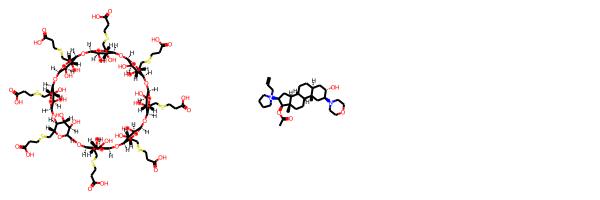

In [5]:
Draw.MolsToGridImage([sug_RdkMol, roc_RdkMol])

In [6]:
sugammadex = BuildingBlock(SUGAMMADEX)
rocuronium = BuildingBlock(ROCURONIUM)

In [7]:
""" Adjust the stk alignment """
roc_start = rocuronium.get_direction()
roc_target = [0,0,-1]
roc_offset = [0,0,1]

""" Flip the stk alignment """
anti_start = roc_start
anti_target = [0,0,1]
anti_offset = [0,0,-1]

In [8]:
complejo = ConstructedMolecule(
    topology_graph=host_guest.Complex(
        host=sugammadex,
        guest=rocuronium,
        guest_start=roc_start,
        guest_target=roc_target,
        displacement=roc_offset
    )
)

antiplejo = ConstructedMolecule(
    topology_graph=host_guest.Complex(
        host=sugammadex,
        guest=rocuronium,
        guest_start=anti_start,
        guest_target=anti_target,
        displacement=anti_offset
    )
)

In [9]:
complejo_RdkMol = complejo.to_rdkit_mol()
display3d(complejo_RdkMol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [10]:
antiplejo_RdkMol = antiplejo.to_rdkit_mol()
display3d(antiplejo_RdkMol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [11]:
%%capture
sug1, roc1 = tuple(complejo.get_building_blocks())
sug1.write('sug_1.sdf')
roc1.write('roc_1.sdf')

In [12]:
%%capture
sug2, roc2 = tuple(antiplejo.get_building_blocks())
sug2.write('sug_2.sdf')
roc2.write('roc_2.sdf')

In [13]:
%%bash
./make-rex.sh -h sug_1.sdf -g roc_1.sdf -f sug-roc_1.yaml
./make-rex.sh -h sug_2.sdf -g roc_2.sdf -f sug-roc_2.yaml

In [14]:
# !yank script --yaml=sug-roc_1.yaml

In [15]:
# !yank script --yaml=sug-roc_2.yaml